# SVM on MNIST dataset 
@author BAIM Mohamed Jalal

In [26]:
# paths
path_x_train = '../data/X_train.csv'
path_x_test = '../data/X_test.csv'
path_y_train = '../data/y_train.csv'
path_y_test = '../data/y_test.csv'

Loading training images...
Loading training labels...
Loading test images...
Loading test labels...
X_train shape: (5000, 784)
Y_train shape: (5000,)
X_test shape: (2500, 784)
Y_test shape: (2500,)


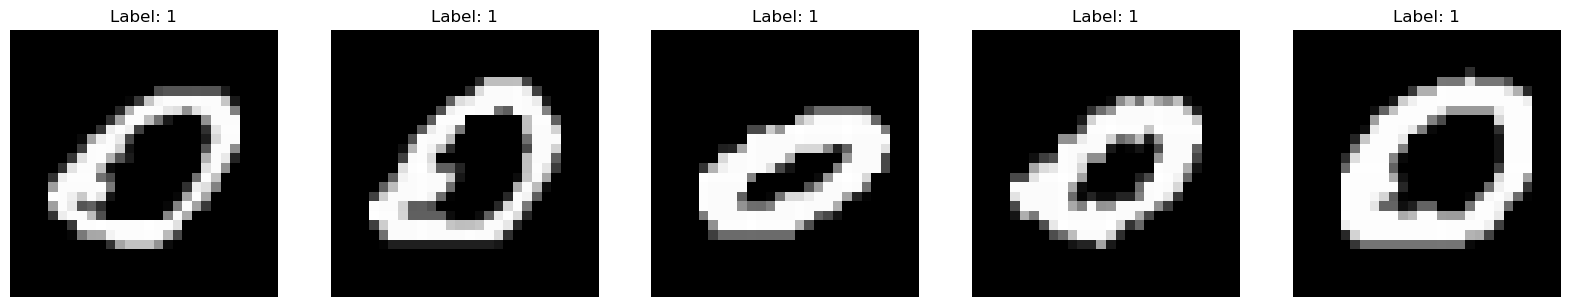

Training Kernel: 0 (linear)
AttributeError: Module 'scipy' has no attribute 'ndarray'
Ensure scipy and numpy are up-to-date.


AttributeError: Module 'scipy' has no attribute 'ndarray'

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from libsvm import svmutil

def load_data(x_train_filepath, y_train_filepath, x_test_filepath, y_test_filepath):
    """
    Loads training and testing data from given file paths.

    Parameters:
    - x_train_filepath: Path to the training images file.
    - y_train_filepath: Path to the training labels file.
    - x_test_filepath: Path to the testing images file.
    - y_test_filepath: Path to the testing labels file.

    Returns:
    - X_train: NumPy array of training images.
    - Y_train: NumPy array of training labels.
    - X_test: NumPy array of testing images.
    - Y_test: NumPy array of testing labels.
    """
    
    print('Loading training images...')
    X_train = np.loadtxt(x_train_filepath, delimiter=',')
    
    print('Loading training labels...')
    Y_train = np.loadtxt(y_train_filepath, dtype=int)
    
    print('Loading test images...')
    X_test = np.loadtxt(x_test_filepath, delimiter=',')
    
    print('Loading test labels...')
    Y_test = np.loadtxt(y_test_filepath, dtype=int)
    
    return X_train, Y_train, X_test, Y_test


def plot_images(images, labels, num_images=5):
    """
    Plots the first num_images images from the given dataset.

    Parameters:
    - images: NumPy array of images.
    - labels: NumPy array of labels.
    - num_images: Number of images to plot.
    """
    
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    
    for i in range(num_images):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title('Label: %d' % labels[i])
        axes[i].axis('off')

    plt.show()

def train(Y, X, kernel):
    # Convert lists if necessary
    if isinstance(Y, np.ndarray):
        Y = Y.tolist()
    if isinstance(X, np.ndarray):
        X = X.tolist()
    try:
        return svmutil.svm_train(Y, X, f'-t {kernel} -q')
    except AttributeError as e:
        print("AttributeError:", e)
        print("Ensure scipy and numpy are up-to-date.")
        raise

def test(Y, X, model):
    # Convert lists if necessary
    if isinstance(Y, np.ndarray):
        Y = Y.tolist()
    if isinstance(X, np.ndarray):
        X = X.tolist()
    return svmutil.svm_predict(Y, X, model)


# Load data
X_train, Y_train, X_test, Y_test = load_data(path_x_train, path_y_train, path_x_test, path_y_test)


print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

# Plot images
plot_images(X_train, Y_train)

# Define kernel types
kernel_types = {
    0: 'linear',      # Linear kernel
    1: 'polynomial',  # Polynomial kernel
    2: 'rbf'          # RBF kernel
}

# Iterate over kernel types
for kernel in range(3):
    print(f'Training Kernel: {kernel} ({kernel_types[kernel]})')
    model = train(Y_train, X_train, kernel)
    p_label, p_acc, p_val = test(Y_test, X_test, model)
    print(f'Accuracy for {kernel_types[kernel]} kernel: {p_acc[0]}%\n')


## Task 1: kernel func 